In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
dataset = pd.read_csv('Restaurant_Reviews.csv', delimiter= '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
import re                    
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []                       

# Preprocessing ( removing stop words and stemming )
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review  = review.split()
    ps = PorterStemmer()
    words = stopwords.words('english')
    words.remove('but')
    words.remove('by')
    words.remove('this')
    words.remove('is')
    words.remove('not')
    
    review = [ps.stem(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorize the corpus
cv = CountVectorizer(max_features= 1566)                
X = cv.fit_transform(corpus).toarray()               
y = dataset.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 25)
pca = PCA(n_components=600)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [6]:
from sklearn.svm import SVC
# Train model
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:5]

,Actual,Predicted
1,1,1
2,1,1
3,0,0
4,0,0


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        49
           1       0.87      0.78      0.82        51

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



Accuracy Score:  0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


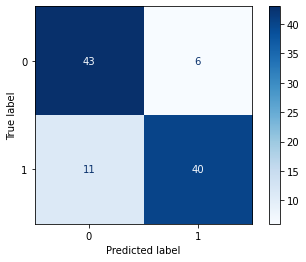

In [8]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(model,X_test , y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

In [9]:
import joblib

# Save pickle for further use
saved_file = 'finalized_model.sav'
joblib.dump(model, saved_file)

['finalized_model.sav']